# Customer Segmentation using RFM, K-means and python

Customer segmentation is a method to know who are our most loyal customers? and who vist our 
platform or e-commerce website frequently,
i.e for other purpose like to shop or to redeem coupons or getting some discounts in short one 
time visiters.

In this project we will perform customer segmentation using machine learning.

* we would create several clusters according to there spending behaviour.
1. we would create clusters of most loyal customers as well as 
2. the customers who are at the verge of churning out.


Here in this project to segment customers we use-
1. RFM Score for each customer.
2. Create clusters using K-Means.



### RFM stands for
* R = recency   --> means how recently customer purchased the item or product.
                  The more recent the purchase is the better the score would be.
* F = frequency --> representes how often a customer purchases an item or product.
                  The more frequent they purchase is the better the scores would be for frequency.
* M = monetary  --> It represents how much the customer spends.
                  The more the amount the better monetry score would be.


Link for dataset - https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Some information about dataset-

* This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
* The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



###  Attribute Information:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

## Importing necessary libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loding the data

Our dataset is in ".xlsx" format i.e in excel sheet format so we use read_excel () to read thye file

In [65]:
data=pd.read_excel("Online Retail.xlsx")


## Data Exploration

#### Lets look into the 1st 5 records, last 5 record and ramdom sample of 5 records from the dataset.

In [66]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [67]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [68]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
159358,550332,22250,DECORATION BUTTERFLY MAGIC GARDEN,2,2011-04-17 13:53:00,0.85,13474.0,United Kingdom
65651,541696,22494,EMERGENCY FIRST AID TIN,1,2011-01-20 18:08:00,2.46,NaN,United Kingdom
536625,581219,22357,KINGS CHOICE BISCUIT TIN,5,2011-12-08 09:28:00,4.13,NaN,United Kingdom
356676,568058,23312,VINTAGE CHRISTMAS GIFT SACK,8,2011-09-23 12:58:00,4.15,18188.0,United Kingdom
247271,558761,21448,12 DAISY PEGS IN WOOD BOX,3,2011-07-03 12:52:00,1.65,15033.0,United Kingdom


#### Now we will check the shape of our dataset

In [69]:
data.shape

(541909, 8)

Our Online Retail dataset contains 541909 rows and 8 columns.

#### Checking column names

In [70]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Look into data types 

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* In our data there are four types of data types present
* object
* float
* int
* datetime


* From the above table one can observe that the Customer Id columns has some missing values

In [72]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Our dataset contain the retail information of 40 countries. 95% of the data is from UK, Germany, France and EIRE.

In [73]:
country_cust_data=data[['Country','CustomerID']]
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
31,Spain,2533
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1877
27,Portugal,1480
0,Australia,1259


 * Here we can drop the duplicate values of 'country' and 'customerId' but as we can see most of the same customer ID has diffrent purchase. so we opt to keep the data.

* From the above table as we can see there are higher records of United Kingdom i.e 361878 .i.e more than 92 % of customers are from UK. So we keep the data for UK only and rest we filter out.

#### keeping only UK data

Here we are just filtering out our data as country== 'United Kingdom' and remaing data is droped. we use query method to perform this filtering.

In [74]:
uk_data=data.query("Country=='United Kingdom'").reset_index(drop=True)

In [75]:
uk_data.shape

(495478, 8)

## Data cleaning

#### Check for the missing values

In [76]:
uk_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

* As from the above table we can see column Description and CustomerID has missing data.
* for now we can ignore missing values in description column and focus on missing values of CustomerID column coz its huge in number.

#### Removing missing values from customerID column

In [77]:
uk_data=uk_data[pd.notnull(uk_data['CustomerID'])]

checking again for null values in uk_dataset.

In [78]:
uk_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* we have sucessfull removed the missing rows from the dataset. 
* one more thing we can observe by droping missing values of customerId columns missing values of Description also droped. As we can see that Missing data of description columns also has misssing customerIDs.

In [79]:
uk_data.shape

(361878, 8)

#### Validate if there are any negative number in quantity column

In [80]:
uk_data.Quantity.min()

-80995

* Oops here in our quantity column there is an negative number. But as we know quantity cannot be negative

#### Validate if there are any negative number in UnitePrice column

In [81]:
uk_data.UnitPrice.min()

0.0

* There is no negative number present.

#### Filtering records with negative values

We are filtering records whose quantity is greater than 0.

In [82]:
uk_data=uk_data[(uk_data['Quantity']>0)]

In [83]:
uk_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
10241,537239,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-06 10:05:00,2.95,18219.0,United Kingdom
231556,559061,23256,CHILDRENS CUTLERY SPACEBOY,2,2011-07-06 10:04:00,4.15,17220.0,United Kingdom
275457,563217,21500,PINK POLKADOT WRAP,25,2011-08-14 13:21:00,0.42,13515.0,United Kingdom
216806,557745,21506,"FANCY FONT BIRTHDAY CARD,",12,2011-06-22 12:16:00,0.42,15750.0,United Kingdom
184129,554098,22147,FELTCRAFT BUTTERFLY HEARTS,4,2011-05-22 13:01:00,1.45,14769.0,United Kingdom


#### create new column name TotalAmount.

In [84]:
uk_data['TotalAmount']=uk_data['Quantity']*uk_data['UnitPrice']

In [85]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Now check the shape of new dataframe

In [86]:
uk_data.shape

(354345, 9)

* After performing various data cleaning operations we are left with 354345 rows and 9 columns.

# Customer segmentation using Recency,Frequency & Monetary (RFM) Modelling

We need to first calculate RFM
* Recency = Latest Date- Last Invoice Date
* Frequency = Count of inviceno. of transactions
* Monetary = Sum of total amount of each customer.

## Importing library

In [87]:
import datetime as dt

Now set the Latest Date as 2011/12/10 as last date in dataset is on invoice was 2011/12/09. This is to calculate the number of days from recent purchases.

In [88]:
Latest_Date=dt.datetime(2011,12,10)

#### Creating RFM model score for each customer

In [89]:
rfm_score=uk_data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(Latest_Date - x.max()).days,'InvoiceNo': lambda x:len(x),'TotalAmount': lambda x: x.sum()})

#### Convert Invoice Date into integer type

In [90]:
rfm_score['InvoiceDate']=rfm_score['InvoiceDate'].astype(int)

#### Rename the colum names into Recency, Frequency and monetary

In [91]:
rfm_score.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalAmount':'Monetary'},inplace=True)

In [92]:
rfm_score.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


* here we can see the customer id 12346 has purchace of $77183.60 at 1 time because frequency is 1 and we can say the customer done the purchace at 11th month. (because 1 year has 365 days and 325 is nearly 11 months)

#### Summary statistics for Recency

In [93]:
rfm_score['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

#### Recency distribution plot

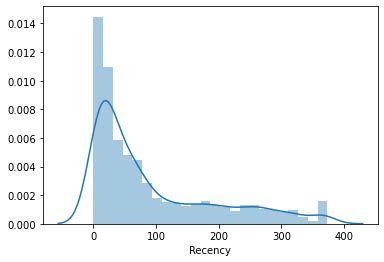

In [94]:
import seaborn as sns

sns.distplot(rfm_score['Recency'])

* from the above plot we can see the recency is right skwed.

#### Summary statistics for Frequency

In [95]:
rfm_score['Frequency'].describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

#### Frequency distribution plot

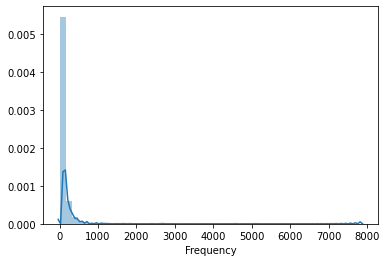

In [96]:
sns.distplot(rfm_score['Frequency'])

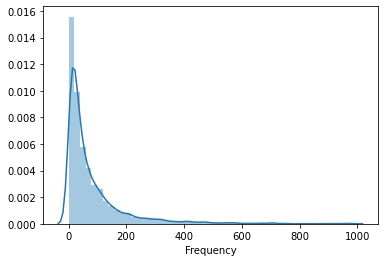

In [97]:
# plotting frequency less than 100
sns.distplot((rfm_score.query('Frequency<1000')['Frequency']))

#### Summary statistics for Monetary

In [98]:
rfm_score['Monetary'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

#### Distribution for monetary

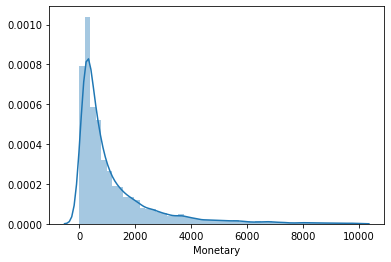

In [99]:
sns.distplot((rfm_score.query('Monetary<10000')['Monetary']))

#### Lets spit our data into 4 segments depend upon quartiles.

We can choose any quantile values as per our business requirements lik we can choose 0.2 etc. and we are coverting data into dictionary

In [100]:
quantiles=rfm_score.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()

In [101]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

Now lets create functions to create R,F,M segments

* we are assigning values 1,2,3,4 in Rscoring like for 0.25 value to return is 1. Higher the Rscore its better to have it.
* On other hand we are assigning values 4,3,2,1 for Fscoring coz here also we need high value i.e for quantile 0.75 we assign value 2.

In [102]:
def Rscoring(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4
    
    
    
def Fscoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1
     


#### R F M segment values

Now we have to calculate and add R,F and M value columns in the existing dataset to show clusters.

In [103]:
rfm_score['R'] = rfm_score['Recency'].apply(Rscoring,args=('Recency',quantiles,))
rfm_score['F'] = rfm_score['Frequency'].apply(Fscoring,args=('Frequency',quantiles,))
rfm_score['M'] = rfm_score['Monetary'].apply(Fscoring,args=('Monetary',quantiles,))
rfm_score.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


#### Creating new RFM Group column for each customers

Creat new column name as RFMGroup column showing combined concatenated score of RFM

In [104]:
rfm_score['RFMGroup'] = rfm_score.R.map(str) +rfm_score.F.map(str) + rfm_score.M.map(str)

#### Calculate and Add rfm_score value column showing total sum of RFMGroup values

In [105]:
rfm_score['RFMScore']= rfm_score[['R','F','M']].sum(axis=1)
rfm_score.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
13991.0,12,84,855.97,1,2,2,122,5
17812.0,12,141,732.16,1,1,2,112,4
13828.0,22,15,209.49,2,4,4,244,10
13938.0,35,7,71.66,2,4,4,244,10
15068.0,46,104,553.36,2,1,3,213,6
16444.0,46,84,654.67,2,2,2,222,6
15289.0,29,58,939.78,2,2,2,222,6
13694.0,3,568,65039.62,1,1,1,111,3
13284.0,330,13,201.19,4,4,4,444,12


* Here as we can see The value of RFM is 2,1,1 the total is 4 that we can see in RFMScore column
* RFMscore gives a scores to customers loyalty.

#### Assigning loyalty level to each customers

Base on the RFM scores we are assigning loyalty level to each customers i.e platinum, goald, silver, bronze.

Here we use pandas qcut method the arguments we pass are 
* Dataframe name
* Column name
* q = no. of segments
* labels = name of labels to give

In [106]:
Loyalty_Level = ['Platinum','Gold','Silver','Bronze']
Score_cuts=pd.qcut(rfm_score.RFMScore,q=4,labels=Loyalty_Level)
rfm_score['RFM_Loyalty_Level'] = Score_cuts.values
rfm_score.reset_index().sample(10)



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
1109,14395.0,2,350,3507.71,1,1,1,111,3,Platinum
28,12847.0,22,91,871.54,2,2,2,222,6,Gold
2857,16796.0,89,18,305.62,3,3,3,333,9,Silver
1016,14250.0,7,111,1904.05,1,1,1,111,3,Platinum
2785,16711.0,3,22,1651.03,1,3,1,131,5,Platinum
417,13395.0,185,21,307.72,4,3,3,433,10,Silver
1820,15379.0,169,194,3703.29,4,1,1,411,6,Gold
1114,14403.0,130,20,1475.81,3,3,2,332,8,Gold
169,13058.0,24,8,271.40,2,4,4,244,10,Silver
1257,14589.0,371,3,39.75,4,4,4,444,12,Bronze


* From above we can see that if a person is in Platinum group it is our most valuable customer and loyal customer as well.
* The customer from Bronze category is has not purchase long and in the verge of churn.

#### Validate the results

Now we have to check if the customers in similar RFMGroup  has same RFM_Loyalty_Level

In [107]:
rfm_score['RFMGroup'].unique()

array(['441', '111', '122', '444', '322', '341', '333', '133', '231',
       '233', '433', '311', '212', '411', '332', '223', '222', '324',
       '443', '321', '312', '422', '343', '344', '211', '423', '112',
       '243', '142', '234', '121', '442', '221', '131', '134', '334',
       '213', '244', '421', '143', '434', '144', '431', '113', '432',
       '132', '331', '242', '342', '424', '323', '123', '232', '224',
       '124', '412', '241', '313', '413', '141', '114'], dtype=object)

First filter data of RFMGroup = 111, then sort it in decending order base on monatry value.

In [108]:
rfm_score[rfm_score['RFMGroup']=='111'].sort_values('Monetary',ascending=False).reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


* we can see cusytomers with RFMGroup that is R,F,M values 1,1,1 n group 111 has highest monetary values of 259657.30$ has the most high loyalty levels i.e Platinum.
* MARKETING STRATEGY -
  * Customers with RFM group 111 are best customers and we can try to cross sell other products of our brand.
  * encourage them to sign up loyalty program to enjoy some elite expriences like - Same day shipping, priority acess to newly launch products etc.
  * If the customer is falling in Group of 444 company may try to offer some reward or coupons to trigger the spendings from this cluster of customers

In [109]:
rfm_score[rfm_score['RFMGroup']=='222'].sort_values('Monetary',ascending=False).reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,13186.0,39,79,1575.89,2,2,2,222,6,Gold
1,15111.0,29,84,1567.48,2,2,2,222,6,Gold
2,13313.0,22,78,1555.32,2,2,2,222,6,Gold
3,13107.0,44,58,1531.62,2,2,2,222,6,Gold
4,16053.0,32,84,1511.95,2,2,2,222,6,Gold


#### visualizations

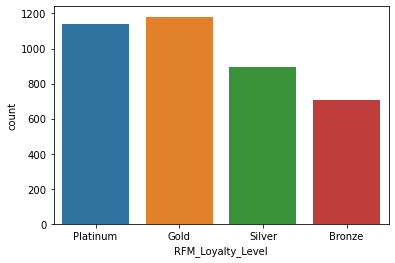

In [111]:
sns.countplot(rfm_score['RFM_Loyalty_Level'])

* From the above plot we can figure out platinum and gold member are good in numbers. and we can make stratiges to improve there exprience.
* There are group of customers verge to churn so we need to focus and build marketing plans for this customers to make them spend more.

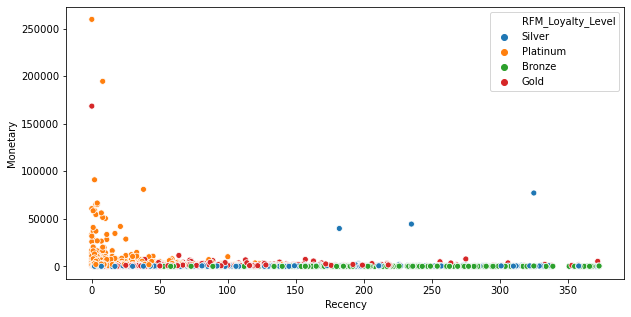

In [119]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rfm_score,x='Recency',y='Monetary',hue='RFM_Loyalty_Level')

* we already knows lower the recency value its better .Same we can see in the above graph the group platinum has lower recency value as its increases the customer falls in the group of bronze and silver.
* There are some outliers like some customers are in silver group but still their recency value is low.

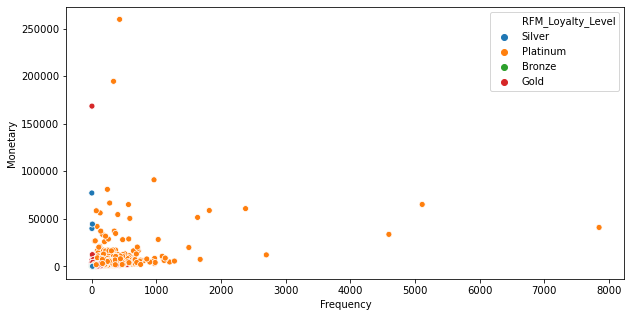

In [120]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rfm_score,x='Frequency',y='Monetary',hue='RFM_Loyalty_Level')

In [149]:
loyalty_group_data=rfm_score[['RFMGroup','RFM_Loyalty_Level']]
a=loyalty_group_data.groupby(['RFMGroup'])['RFM_Loyalty_Level'].aggregate('count').reset_index().sort_values('RFM_Loyalty_Level',ascending=False).head(10)
a

,RFMGroup,RFM_Loyalty_Level
0,111,409
60,444,343
16,211,186
55,433,180
45,344,168
20,222,156
35,322,142
40,333,141
5,122,124
30,244,112


Here we can see top 10 RFMGroups which are occured frequently

# K-Means Clustring Model

First we need to normalize and scale the data in order to creat clusters out of the data points. Because clustring uses distance similarity factor hence we need to scale the data. As well as we need to normalize it if the data is right skewed or left skewed.In previous model we have plot the data and we know its right skewed

#### handling negative and zero values

We have to handle negative and zero values because  these values go negative infinite when thy are on log scale. we are using log transformation technique to normalize the data.

In [124]:
def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num

#### Apply define function to recency and monetary columns


In [125]:
rfm_score['Recency']= [handle_neg_n_zero(x) for x in rfm_score.Recency]
rfm_score['Monetary']= [handle_neg_n_zero(x) for x in rfm_score.Monetary]

#### Log Transformation

Perform Log Transformation to bring data into normal or near normal distribution.

In [126]:
Log_Tfd_Data=rfm_score[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

#### Data distribution for Recency , Frequency and Monetary columns

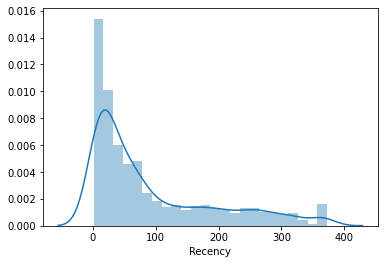

In [128]:
sns.distplot(rfm_score['Recency'])

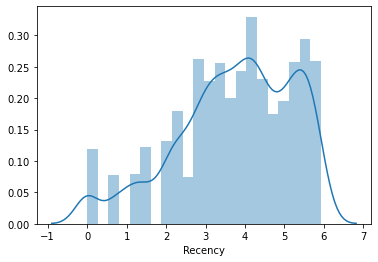

In [127]:
recency_plot=Log_Tfd_Data['Recency']
sns.distplot(recency_plot)

We can see the diffrence between plot before log transform and after normalizing.

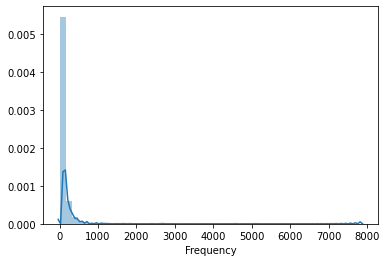

In [129]:
sns.distplot(rfm_score['Frequency'])

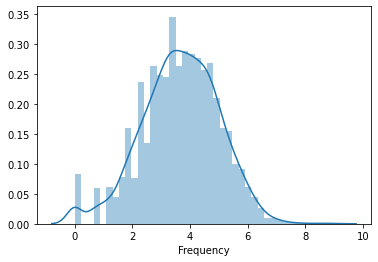

In [133]:
Frequency_plot=Log_Tfd_Data['Frequency']
sns.distplot(Frequency_plot)

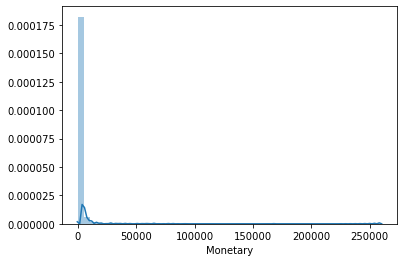

In [131]:
sns.distplot(rfm_score['Monetary'])

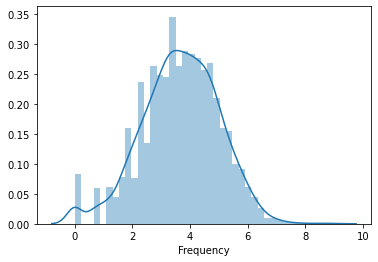

In [134]:
Monetary_plot=Log_Tfd_Data['Frequency']
sns.distplot(Monetary_plot)

Now we are getting the data in same scale so if you notice monetary values ranging  from 100 to millions. where as recency values ranging from 1 to 200 in RFM score dataframe. So there is need to bring them on same scale in order to standardize them. By doing this our model can grasps the trends between these values easily and accurately.

In [135]:
from sklearn.preprocessing import  StandardScaler

#### Bring the all data on same scale

In [137]:
scaleobj=StandardScaler()
Scaled_Data=scaleobj.fit_transform(Log_Tfd_Data)

now transform it into dataframe

In [138]:
Scaled_Data=pd.DataFrame(Scaled_Data,index=rfm_score.index,columns=Log_Tfd_Data.columns)

Now our data is in good shape to create the model.

But we dont know how many clusters to make. we cannot choose the no. of clusters randomly. so we use elbow method to find out optimum no. of k in k-mean clustring.

* ELBOW METHOD

========================================

* Elbow methond involves to run the algorithm multiple times over a loop with an increasing number of cluster choice and ploting a clustering score as a function of the no. of clusters. When K increases the centroids are closer to cluster centroids so improvement declined at some point of time rapidly creating the elbow shape.
* The graph is in Elbow shape.
* We take the count of cluster at the point where this elbow is bending

Text(0.5, 1.0, 'Elbow Method For Optimal K')

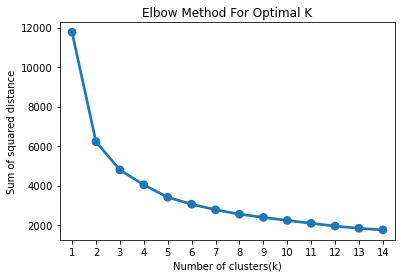

In [156]:
from sklearn.cluster import KMeans


sum_of_sq_dist= {}
for k in range(1,15):
    km = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
    
# Plot the graph for the sum os squared distance values and no. of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal K')

* We can see from the above graph that the k is decreasing suddenly after the point k=3 so 3 is the optimal value of K in our case.
* we can say no. of clusters= 3.

## Building k-mean clustring

In [159]:
KMean_clust = KMeans(n_clusters = 3,init='k-means++',max_iter = 1000)
KMean_clust .fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=3)

Now lets find out the clusters for the observation given in the dataset

In [160]:
rfm_score['Cluster'] = KMean_clust.labels_
rfm_score.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
13441.0,91,13,296.64,3,4,4,344,11,Bronze,1
15738.0,18,173,4812.42,2,1,1,211,4,Platinum,0
15164.0,68,103,843.05,3,1,2,312,6,Gold,2
12930.0,78,25,415.80,3,3,3,333,9,Silver,1
14821.0,366,2,48.80,4,4,4,444,12,Bronze,1
17083.0,109,52,1405.78,3,2,2,322,7,Gold,2
17877.0,170,12,237.61,4,4,4,444,12,Bronze,1
17566.0,8,152,901.21,1,1,2,112,4,Platinum,0
17163.0,21,5,293.10,2,4,4,244,10,Silver,1


* Here ther are 3 clusters created i.e 0,1,2.
* Cluster no is assign for each customers.
* By looking in the table we can see the group 'Bronze' and 'Silver' are merge together and form cluster no. 1

#### Cluster visulization

Plotting scatterplot frequency vs recency

<Figure size 504x504 with 0 Axes>

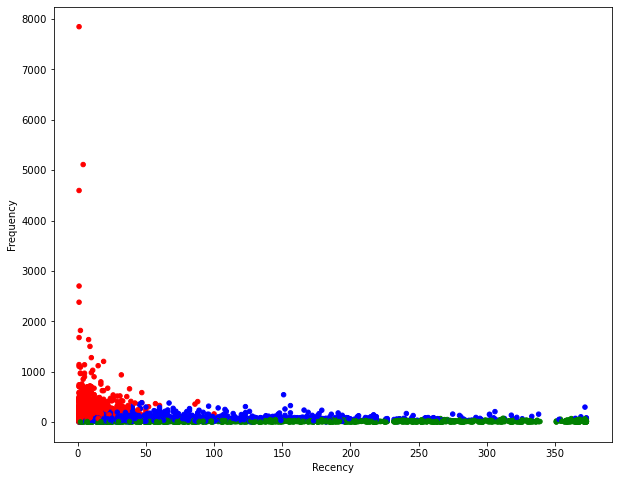

In [165]:
plt.figure(figsize=(7,7))
colors=['red','green','blue']
rfm_score['color']=rfm_score['Cluster'].map(lambda x: colors[x])
rfm_score.plot(kind='scatter',x='Recency',y='Frequency',figsize=(10,8),c=rfm_score['color'])

In [166]:
rfm_score.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0,red
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0,red
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0,red
12820.0,3,59,942.34,1,2,2,122,5,Platinum,0,red


From above we can notice one thing that having high monetary value dose not promises to be an loyal customer. It can fall in the cluster of customers verge to churn. 